<a href="https://colab.research.google.com/github/PrinceSilaban17/Project-Data-Mining-Kelompok-7/blob/main/BC_SVM_BPJS_KEL_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/DAMI/fraud_detection_train.csv")

In [4]:
data.sample(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
119267,119268,101,9,SD,P,64,2,0,Q,0,m00_m99,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115092,115093,201,38,I2,L,18,2,0,U,0,h60_h95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
178290,178291,1301,217,B,P,72,2,0,Q,0,e00_e90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39436,39437,1110,160,SC,L,45,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
28449,28450,1311,192,D,L,18,1,3,D,1,d50_d89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20467,20468,903,113,SC,P,9,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99676,99677,902,112,I3,L,65,2,0,Q,0,i00_i99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6719,6720,1007,129,B,L,67,1,12,J,1,j00_j99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26676,26677,1101,173,A,P,42,2,0,Z,0,c00_d48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
79438,79439,1106,170,SD,P,46,2,0,Z,0,c00_d48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## EXPLORATORY DATA ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

Pada dataset terdapat 52 kolom data, yang terdiri dari 4 fitur bertipe object, dan 48 bertipe numeric

In [6]:
data.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,0.048213,0.005184,0.015034,0.019799,0.007082,0.064190,0.026661,0.0,0.005844,0.021217,0.025203,0.041435,0.026122,0.006213,0.031236,0.008935,0.0,0.005854,0.049182,0.019963,0.026491,0.003336,0.000559,0.002198,0.007777,0.017876,0.003981,0.017156,0.004530,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,0.244711,0.073262,0.127421,0.161491,0.087644,0.273869,0.169462,0.0,0.079051,0.153505,0.164727,0.269264,0.254258,0.097985,0.182940,0.116449,0.0,0.076416,0.222576,0.162565,0.173277,0.061113,0.023855,0.047882,0.101456,0.136656,0.066816,0.144561,0.071477,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000,6.000000,4.000000

**@Checking Data Null**

In [8]:
data.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

Seperti yg dapat kita lihat, pada seluruh kolom yang ada, tidak ada satu pun features yg memiliki data null/kosong, sehingga kita tidak perlu melakukan handling missing value

**@Melihat korelasi antar data**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data.corr()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
visit_id,1.000000,-0.011731,-0.021932,-0.010438,-0.045508,0.034915,0.014872,-0.006828,-0.009841,0.004737,0.014710,0.004120,0.011962,-0.012295,0.015021,0.011473,-0.001725,NaN,0.002897,0.009741,-0.016929,0.011713,0.021295,0.007206,-0.005773,-0.019370,NaN,0.010106,0.021541,-0.009680,-0.002157,0.003187,0.005912,-0.012640,0.008187,0.037471,0.021874,-0.002852,0.003366,-0.006702,-0.001818,-0.009242,0.032540,-0.007684,-0.007534,0.032030,-0.014416,NaN,-0.866024
kdkc,-0.011731,1.000000,0.735047,0.018384,0.016699,0.005203,0.000892,0.009657,0.001694,0.012836,0.006890,-0.007103,0.008913,0.018962,-0.007202,0.005237,0.003006,NaN,0.005418,-0.004703,0.013935,0.009091,0.015162,-0.003056,0.018264,0.016444,NaN,0.028617,0.018487,0.030126,-0.025214,0.002699,0.001684,-0.011885,-0.006965,-0.024509,-0.003713,0.022214,-0.000078,0.004717,0.002246,0.025413,0.005988,0.003788,0.005327,0.140364,-0.020848,NaN,0.013042
dati2,-0.021932,0.735047,1.000000,0.009503,0.019685,0.000190,-0.010347,0.004740,-0.004139,0.006376,0.000740,-0.011547,0.003217,0.013045,-0.001611,0.000223,-0.000991,NaN,0.011303,-0.007803,0.007286,0.008468,0.007199,-0.008458,0.011834,0.009788,NaN,0.002077,0.010735,0.027345,-0.011783,0.003499,0.002566,-0.013380,-0.013377,-0.028262,-0.007301,0.014014,-0.005007,0.003028,-0.000235,0.026815,0.008712,0.000509,-0.001456,0.114995,-0.023228,NaN,0.026380
umur,-0.010438,0.018384,0.009503,1.000000,0.128256,-0.020829,-0.053836,-0.001917,0.040204,0.035004,0.105917,-0.011816,0.044672,0.072040,0.008868,0.199329,0.017609,NaN,0.018222,0.106364,0.087791,-0.051937,-0.163068,-0.087092,0.017903,0.001027,NaN,0.002168,-0.094135,0.069715,-0.004546,-0.040769,-0.017680,-0.006478,-0.005206,0.060572,-0.025828,0.032361,-0.004434,-0.038020,-0.011117,-0.040131,-0.043729,-0.005051,-0.004239,0.049301,0.000052,NaN,0.013498
jnspelsep,-0.045508,0.016699,0.019685,0.128256,1.000000,-0.329130,-0.871875,-0.117270,-0.006429,-0.164915,-0.149916,0.017652,-0.030758,0.070432,0.013118,-0.078836,-0.074532,NaN,-0.017282,0.037621,-0.097139,-0.198647,-0.140175,-0.038933,-0.067561,-0.064773,NaN,-0.025291,-0.202230,-0.029927,0.054517,-0.048208,-0.025828,0.003171,-0.094717,-0.049204,-0.080557,-0.133978,-0.081644,-0.094619,-0.123186,-0.149951,-0.174351,-0.044323,-0.098966,-0.307863,0.036427,NaN,0.053215
los,0.034915,0.005203,0.000190,-0.020829,-0.329130,1.000000,0.331709,0.073423,0.009259,0.105383,0.106347,0.013492,0.042924,-0.023979,-0.004357,0.043287,0.055127,NaN,0.024838,-0.007106,0.043705,0.026534,0.125529,0.046263,0.033886,0.047884,NaN,0.017911,0.036327,0.017059,-0.021221,0.013265,0.001931,0.010367,0.083848,0.030778,0.055884,0.057764,0.038767,0.033102,0.012562,0.005886,0.029918,0.027955,0.045374,0.178267,-0.013787,NaN,-0.040318
severitylevel,0.014872,0.000892,-0.010347,-0.053836,-0.871875,0.331709,1.000000,0.228927,0.023195,0.285605,0.253797,-0.012491,0.085643,-0.062009,-0.012069,0.162390,0.172514,NaN,0.035154,-0.026341,0.177166,0.202354,0.188356,0.063726,0.119119,0.095258,NaN,0.024120,0.172808,0.026195,-0.054808,0.031036,0.016823,0.002393,0.145312,0.082847,0.077628,0.138484,0.064391,0.068802,0.092219,0.149301,0.140230,0.043834,0.084619,0.344314,-0.033935,NaN,-0.018313
dx2_a00_b99,-0.006828,0.009657,0.004740,-0.001917,-0.117270,0.073423,0.228927,1.000000,0.001458,0.052295,0.091536,-0.002030,0.018834,-0.015927,0.001298,0.018528,0.054621,NaN,0.027560,-0.006157,0.037021,-0.013529,-0.012113,0.003148,0.042565,-0.002781,NaN,-0.008115,-0.018799,-0.008603,-0.020052,-0.004340,-0.003593,-0.0038

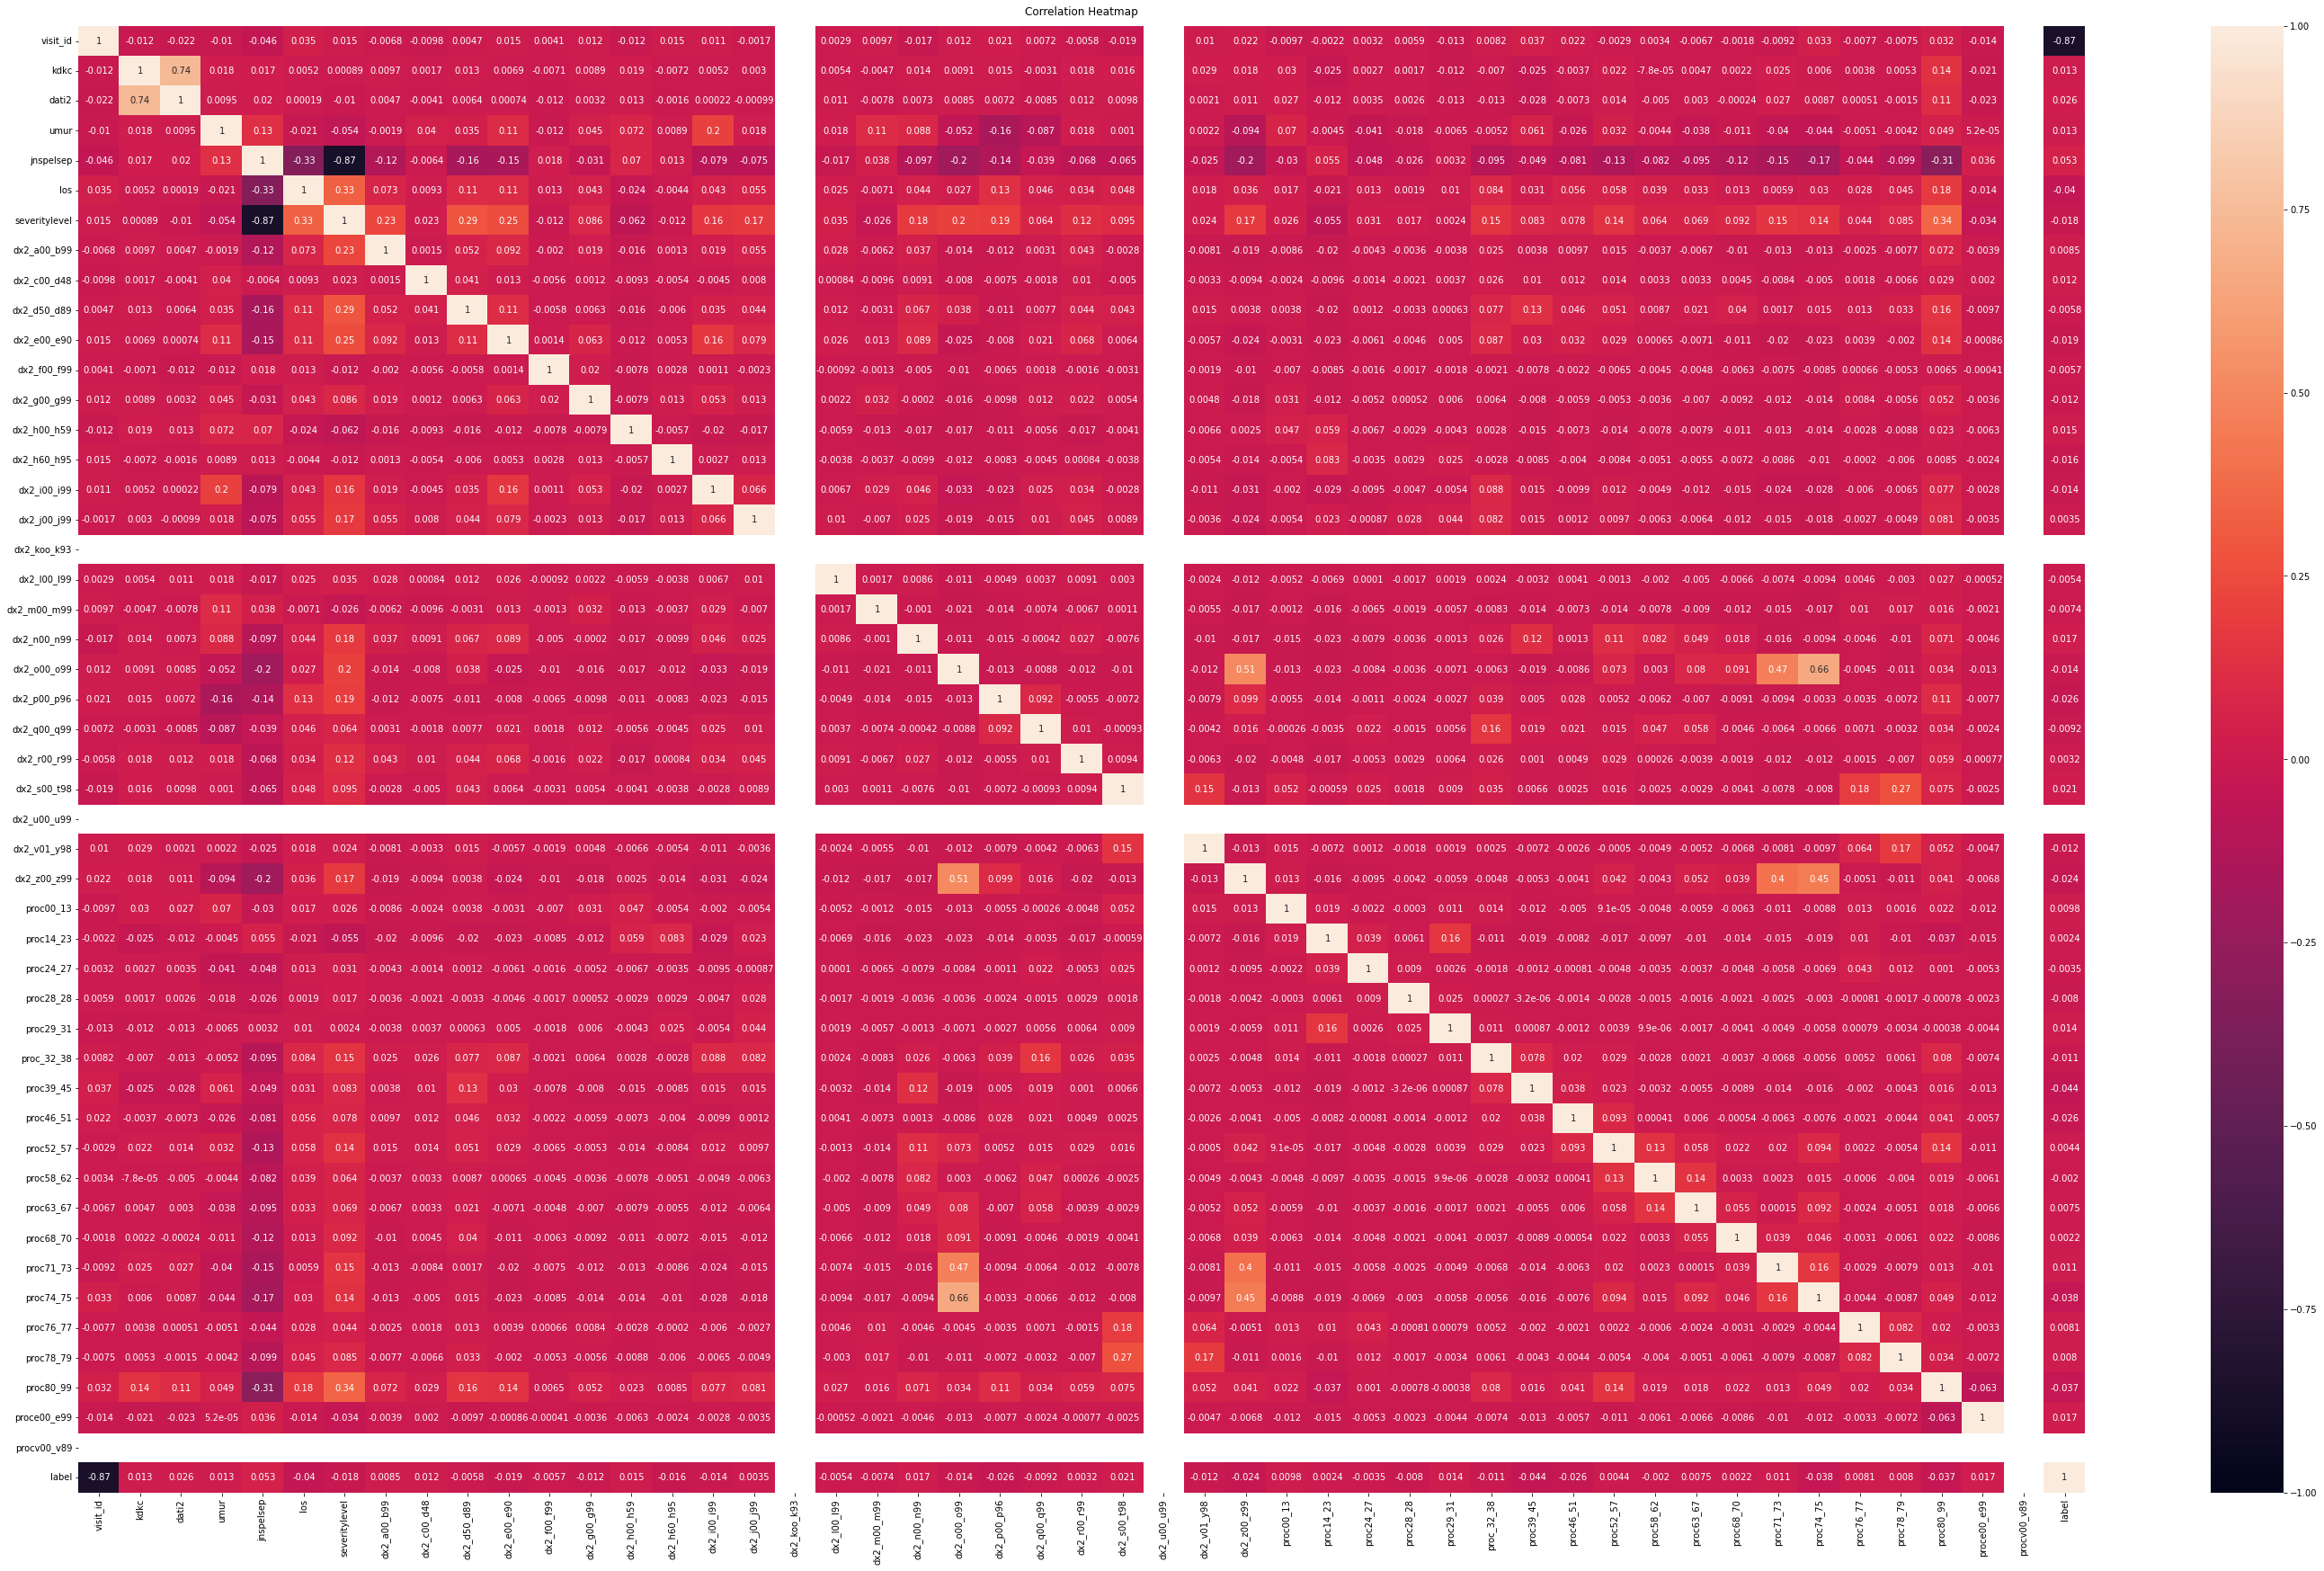

In [11]:
#Visualisasi korelasi antara fitur
plt.figure(figsize=(50, 30))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Dari visualisasi daitas kita bisa menemukan bahwa :
1. jnspelsep dan severitylevel memiliki korelasi yg cukup tinggi yaitu 0,87 , yaang dimana jnspelslep adalah dataset yang berisi: **tingkat pelayanan; 1:rawat inap; 2. rawat jalan** sedangkan severitylevel berisi **tingkat urgensi**

## **DATA PREPARATION** ##



*   Memilah dan Membersihkan Data





1. Handling Missing Data

Recode/Replace

In [12]:
import pandas as pd
ebola = pd.read_csv("/content/drive/MyDrive/DAMI/fraud_detection_train.csv")
print(ebola.fillna(0).iloc[0:10, 0:5])

   visit_id  kdkc  dati2 typeppk jkpst
0         1  1107    150      SB     P
1         2  1303    200      C      L
2         3  1114    172      B      P
3         4   601     90      SC     L
4         5  1006    130      B      L
5         6  1016    117      SC     L
6         7   202     26      SC     L
7         8  2101    309      KM     P
8         9  1013    111      B      P
9        10   903    113      A      P


Fill Forward

In [13]:
print(ebola.fillna(method='ffill').iloc[0:10, 0:5])

   visit_id  kdkc  dati2 typeppk jkpst
0         1  1107    150      SB     P
1         2  1303    200      C      L
2         3  1114    172      B      P
3         4   601     90      SC     L
4         5  1006    130      B      L
5         6  1016    117      SC     L
6         7   202     26      SC     L
7         8  2101    309      KM     P
8         9  1013    111      B      P
9        10   903    113      A      P


 Fill Backward

In [14]:
print(ebola.fillna(method='bfill').iloc[:,0:5].tail())

        visit_id  kdkc  dati2 typeppk jkpst
200212    200213  2102    353      B      P
200213    200214  1308    212      SD     L
200214    200215   201     38      SB     P
200215    200216  1008    128      B      P
200216    200217  1016    117      SC     L


 Interpolate

In [15]:
print(ebola.interpolate().iloc[0:10,0:5])

   visit_id  kdkc  dati2 typeppk jkpst
0         1  1107    150      SB     P
1         2  1303    200      C      L
2         3  1114    172      B      P
3         4   601     90      SC     L
4         5  1006    130      B      L
5         6  1016    117      SC     L
6         7   202     26      SC     L
7         8  2101    309      KM     P
8         9  1013    111      B      P
9        10   903    113      A      P


Drop Missing Values

In [16]:
print(ebola.shape)

(200217, 53)


In [17]:
ebola_dropna = ebola.dropna()
print(ebola_dropna.shape)

(200217, 53)


In [18]:
print(ebola_dropna)

        visit_id  kdkc  dati2  ... proce00_e99 procv00_v89  label
0              1  1107    150  ...           0           0      1
1              2  1303    200  ...           0           0      1
2              3  1114    172  ...           0           0      1
3              4   601     90  ...           0           0      1
4              5  1006    130  ...           0           0      1
...          ...   ...    ...  ...         ...         ...    ...
200212    200213  2102    353  ...           0           0      0
200213    200214  1308    212  ...           0           0      0
200214    200215   201     38  ...           0           0      0
200215    200216  1008    128  ...           0           0      0
200216    200217  1016    117  ...           0           0      0

[200217 rows x 53 columns]


2. Membuang (drop) Kolom

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/DAMI/fraud_detection_train.csv")

In [24]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Mengubah Index ke DataFrame

In [25]:
df['visit_id'].is_unique

True

In [26]:
df = df.set_index('visit_id')
df.head()

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
visit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
df.loc[206]

kdkc                2501
dati2                444
typeppk               D 
jkpst                  P
umur                  44
jnspelsep              1
los                    0
cmg                    A
severitylevel          2
diagprimer       a00_b99
dx2_a00_b99            1
dx2_c00_d48            0
dx2_d50_d89            0
dx2_e00_e90            0
dx2_f00_f99            0
dx2_g00_g99            0
dx2_h00_h59            0
dx2_h60_h95            0
dx2_i00_i99            0
dx2_j00_j99            0
dx2_koo_k93            0
dx2_l00_l99            0
dx2_m00_m99            0
dx2_n00_n99            0
dx2_o00_o99            0
dx2_p00_p96            0
dx2_q00_q99            0
dx2_r00_r99            0
dx2_s00_t98            0
dx2_u00_u99            0
dx2_v01_y98            0
dx2_z00_z99            0
proc00_13              0
proc14_23              0
proc24_27              0
proc28_28              0
proc29_31              0
proc_32_38             0
proc39_45              0
proc46_51              0


Merapihkan Fields dalam Data

In [28]:
df.dtypes.value_counts()

int64     48
object     4
dtype: int64

In [30]:
df.loc[64:, 'umur'].head(10)

visit_id
64    23
65     4
66    15
67    28
68    22
69    29
70    79
71    44
72    36
73    68
Name: umur, dtype: int64

In [31]:
regex = r'^(\d{4})'

Membersihkan Kolom dengan Kombinasi metode str dengan NumPy

In [33]:
df['umur'].head(10)

visit_id
1     64
2     45
3     34
4     34
5     27
6      0
7     73
8     64
9     21
10    44
Name: umur, dtype: int64